In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, Xception, InceptionV3, DenseNet201, MobileNet
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *

In [ ]:
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    zoom_range= 0.2,
    shear_range=0.1,
    rotation_range=15,
)

test_data_generator = ImageDataGenerator(rescale = 1./255)
val_data_generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_data_generator.flow_from_directory(
    directory = '/kaggle/input/plant-disease-recognition-dataset/Train/Train',
    class_mode = 'categorical',
    target_size = (128,128),
    batch_size = 32,
)

test_generator = test_data_generator.flow_from_directory(
    directory = '/kaggle/input/plant-disease-recognition-dataset/Test/Test',
    class_mode = 'categorical',
    target_size = (128,128),
    batch_size = 32,
    shuffle = False
)
val_generator = val_data_generator.flow_from_directory(
    directory = '/kaggle/input/plant-disease-recognition-dataset/Validation/Validation',
    class_mode = 'categorical',
    target_size = (128,128),
    batch_size = 32,
    shuffle = False
)

Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


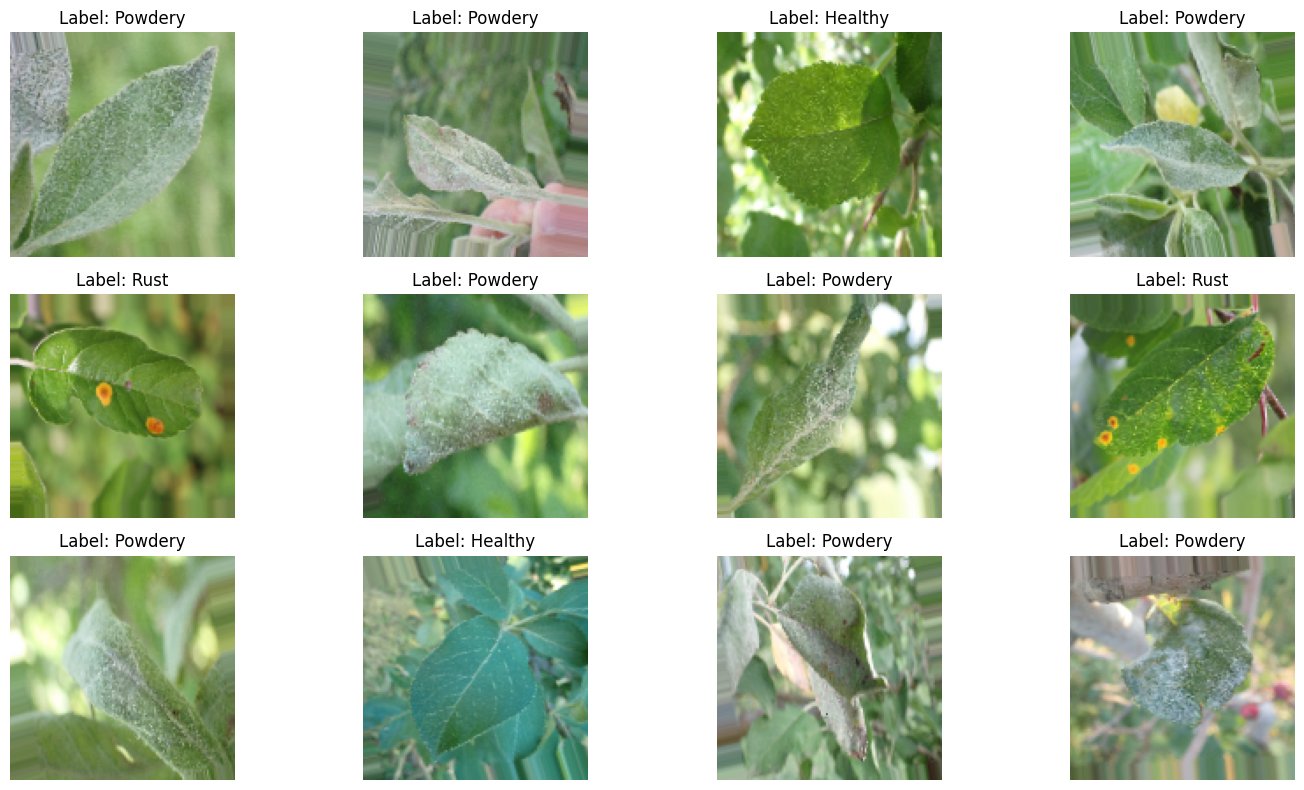

In [ ]:
# Get a batch of images and labels
images, labels = next(train_generator)

# Class names
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(15, 8))

for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(f"Label: {class_names[label_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Custom CNN

In [ ]:
model1 = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation = 'relu'),

    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(3, activation = 'softmax')

])
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,190,051 (4.54 MB)

 Trainable params: 1,190,051 (4.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history1 = model1.fit(train_generator, epochs = 10, batch_size = 128, validation_data = test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.3886 - loss: 1.0936 - val_accuracy: 0.5467 - val_loss: 0.8075
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6111 - loss: 0.7585 - val_accuracy: 0.7200 - val_loss: 0.7602
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6287 - loss: 0.8246 - val_accuracy: 0.7600 - val_loss: 0.7365
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.8205 - loss: 0.4614 - val_accuracy: 0.8000 - val_loss: 0.5054
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8221 - loss: 0.4588 - val_accuracy: 0.8600 - val_loss: 0.3531
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9102 - loss: 0.2401 - val_accuracy: 0.8667 - val_loss: 0.4374
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9157 - loss: 0.2514 - val_accuracy: 0.9067 - val_loss: 0.2980
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9416 - loss: 0.1806 - val_accuracy: 0.8800 - val_los

In [ ]:
test_loss , test_accuracy = model1.evaluate(test_generator)
print(f"test loss: {test_loss}, test accuracy : {test_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9419 - loss: 0.2761
test loss: 0.28690287470817566, test accuracy : 0.9466666579246521


In [ ]:
y_true = test_generator.classes

y_pred_prob = model1.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


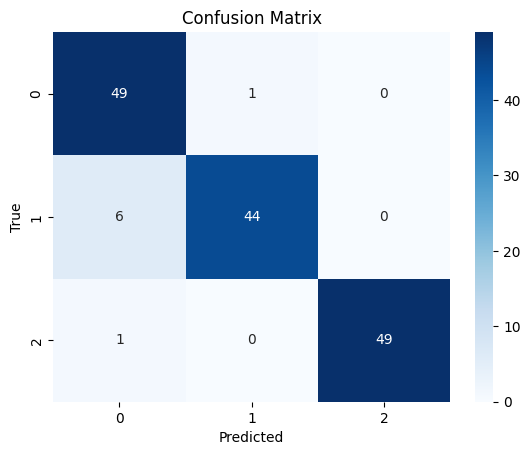

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_true, y_pred, target_names = test_generator.class_indices.keys()))

              precision    recall  f1-score   support

     Healthy       0.88      0.98      0.92        50
     Powdery       0.98      0.88      0.93        50
        Rust       1.00      0.98      0.99        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



# VGG16 Model

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

vgg_model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg_history = vgg_model.fit(train_generator, epochs = 10, batch_size = 128, validation_data = test_generator)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.5239 - loss: 1.3976 - val_accuracy: 0.8067 - val_loss: 0.5337
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.8064 - loss: 0.4922 - val_accuracy: 0.8133 - val_loss: 0.5076
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8332 - loss: 0.4434 - val_accuracy: 0.8200 - val_loss: 0.4504
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8272 - loss: 0.4280 - val_accuracy: 0.7800 - val_loss: 0.5788
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8302 - loss: 0.4196 - val_accuracy: 0.8333 - val_loss: 0.4451
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8642 - loss: 0.3591 - val_accuracy: 0.7867 - val_loss: 0.6136
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.8615 - loss: 0.3647 - val_accuracy: 0.8067 - val_loss: 0.4884
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8674 - loss: 0.3522 - val_accuracy: 0.8533 - val_lo

In [ ]:
test_loss , test_accuracy = vgg_model.evaluate(test_generator)
print(f"test loss: {test_loss}, test accuracy : {test_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7962 - loss: 0.4814
test loss: 0.44771596789360046, test accuracy : 0.8066666722297668


In [ ]:
y_true = test_generator.classes

vgg_y_pred_prob = vgg_model.predict(test_generator)
vgg_y_pred = np.argmax(vgg_y_pred_prob, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


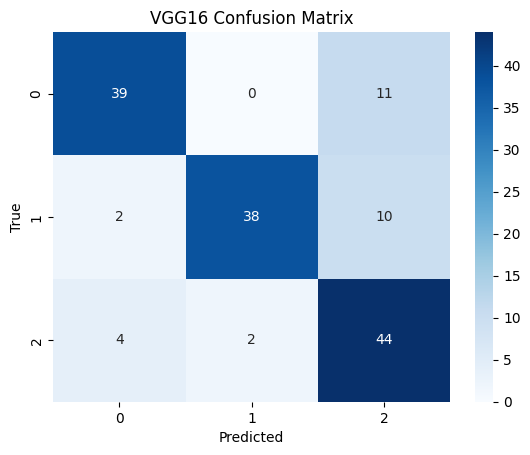

              precision    recall  f1-score   support

     Healthy       0.87      0.78      0.82        50
     Powdery       0.95      0.76      0.84        50
        Rust       0.68      0.88      0.77        50

    accuracy                           0.81       150
   macro avg       0.83      0.81      0.81       150
weighted avg       0.83      0.81      0.81       150



In [ ]:
cm = confusion_matrix(y_true, vgg_y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VGG16 Confusion Matrix')
plt.show()

print(classification_report(y_true, vgg_y_pred, target_names = test_generator.class_indices.keys()))

# MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

mobilenet_model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mobilenet_history = mobilenet_model.fit(train_generator, epochs = 10, batch_size = 128, validation_data = test_generator)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.6655 - loss: 4.4386 - val_accuracy: 0.8733 - val_loss: 0.7604
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9338 - loss: 0.3098 - val_accuracy: 0.9467 - val_loss: 0.2632
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.9531 - loss: 0.1254 - val_accuracy: 0.9267 - val_loss: 0.3583
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.9489 - loss: 0.1591 - val_accuracy: 0.9200 - val_loss: 0.5053
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9652 - loss: 0.1036 - val_accuracy: 0.9467 - val_loss: 0.2932
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9643 - loss: 0.0996 - val_accuracy: 0.9267 - val_loss: 0.4651
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9617 - loss: 0.1213 - val_accuracy: 0.9400 - val_loss: 0.2592
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9709 - loss: 0.0811 - val_accuracy: 0.9533 - val_lo

In [ ]:
test_loss , test_accuracy = mobilenet_model.evaluate(test_generator)
print(f"test loss: {test_loss}, test accuracy : {test_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9624 - loss: 0.2141
test loss: 0.22485822439193726, test accuracy : 0.9599999785423279


In [ ]:
y_true = test_generator.classes

mobilenet_y_pred_prob = mobilenet_model.predict(test_generator)
mobilenet_y_pred = np.argmax(mobilenet_y_pred_prob, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step


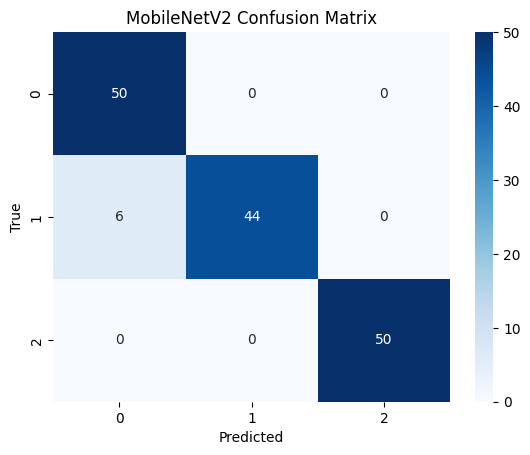

              precision    recall  f1-score   support

     Healthy       0.89      1.00      0.94        50
     Powdery       1.00      0.88      0.94        50
        Rust       1.00      1.00      1.00        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
cm = confusion_matrix(y_true, mobilenet_y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MobileNetV2 Confusion Matrix')
plt.show()

print(classification_report(y_true, mobilenet_y_pred, target_names = test_generator.class_indices.keys()))

# compare 3 Models accuracy

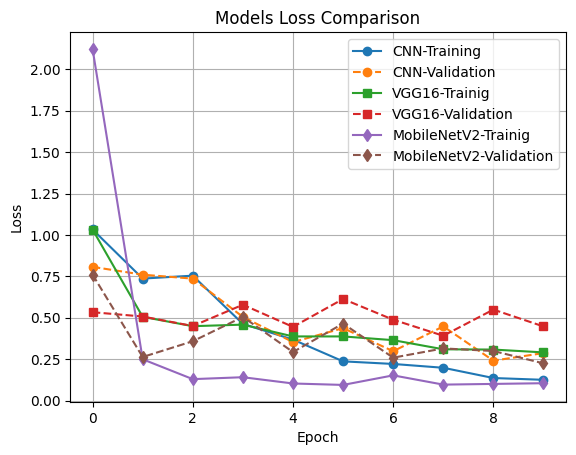

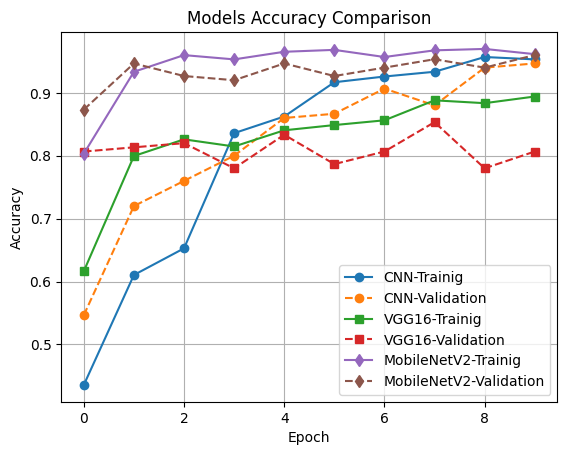

In [ ]:
plt.plot(history1.history['loss'], label = 'CNN-Training', marker = 'o')
plt.plot(history1.history['val_loss'], label = 'CNN-Validation',linestyle = '--', marker = 'o')

plt.plot(vgg_history.history['loss'], label = 'VGG16-Trainig', marker = 's')
plt.plot(vgg_history.history['val_loss'], label = 'VGG16-Validation',linestyle = '--', marker = 's')

plt.plot(mobilenet_history.history['loss'], label = 'MobileNetV2-Trainig', marker = 'd')
plt.plot(mobilenet_history.history['val_loss'], label = 'MobileNetV2-Validation',linestyle = '--', marker = 'd')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Models Loss Comparison')
plt.legend()
plt.grid()
plt.show()


plt.plot(history1.history['accuracy'], label = 'CNN-Trainig', marker = 'o')
plt.plot(history1.history['val_accuracy'], label = 'CNN-Validation',linestyle = '--', marker = 'o')

plt.plot(vgg_history.history['accuracy'], label = 'VGG16-Trainig', marker = 's')
plt.plot(vgg_history.history['val_accuracy'], label = 'VGG16-Validation',linestyle = '--', marker = 's')

plt.plot(mobilenet_history.history['accuracy'], label = 'MobileNetV2-Trainig', marker = 'd')
plt.plot(mobilenet_history.history['val_accuracy'], label = 'MobileNetV2-Validation',linestyle = '--', marker = 'd')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Models Accuracy Comparison')
plt.legend()
plt.grid()
plt.show()